In [3]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import sqrt

# Define the states u and v (for demonstration, we'll use 1-qubit states)
# For |u> = |0> and |v> = |0>
u = [1, 0]
v = [1, 0]

# Initialize quantum circuit
n = 1  # Number of qubits in u and v
qc = QuantumCircuit(n * 2 + 1, 1)

# Initialize states u and v
qc.initialize(u, 1)
qc.initialize(v, 2)

# Apply Hadamard gate on ancillary qubit (qubit 0)
qc.h(0)

# Apply controlled-SWAP
qc.cswap(0, 1, 2)

# Apply Hadamard on ancillary qubit again
qc.h(0)

# Measure the ancillary qubit
qc.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

# Get measurement results and calculate probability of measuring '0'
counts = result.get_counts()
prob_0 = counts.get('0', 0) / sum(counts.values())

# Calculate <u|v> from the probability of measuring '0'
inner_product_squared = 2 * prob_0 - 1

# Display results
print(f"Counts: {counts}")
print(f"P(0): {prob_0}")
print(f"|<u|v>|^2: {inner_product_squared}")
# Plot the measurement results
plot_histogram(counts).show()



Counts: {'0': 1000}
P(0): 1.0
|<u|v>|^2: 1.0


## 3: Grover's Search Numerics
### 3b. For each value of \(n \in \lbrace 1,2,3, \dots, 500 \rbrace\), find the number \(k, 1 \leq k \leq \sqrt{n}\), of queries to make, in Grover's search algorithm, that maximizes the success probability. Assume that there is always exactly one marked item. Plot your answers, superimposed with the graph of \({\pi \over 4} \sqrt{n}\). 

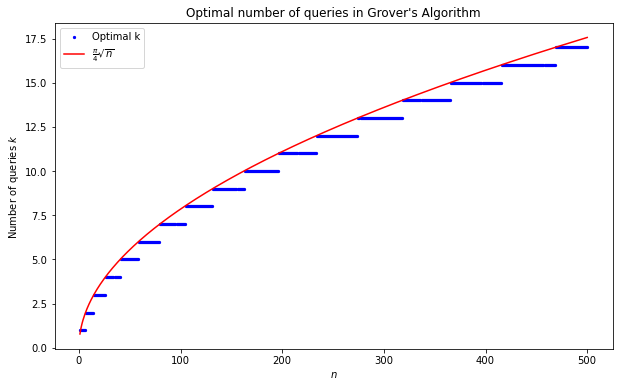

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Finding the k that maximizes P(k, n)
def find_best_k(n):
    theta = np.arcsin(1/np.sqrt(n))
    max_prob = 0
    best_k = 1
    for k in range(1, int(np.sqrt(n)) + 1):
        prob = np.sin((2*k + 1) * theta)**2
        if prob > max_prob:
            max_prob = prob
            best_k = k
    return best_k

# Getting the  data points
n_values = np.arange(1, 501)
k_values = [find_best_k(n) for n in n_values]

# Plotting the graph 
plt.figure(figsize=(10, 6))
plt.scatter(n_values, k_values, label="Optimal k", s=5, c='b')
plt.plot(n_values, np.pi/4 * np.sqrt(n_values), label=r"$\frac{\pi}{4} \sqrt{n}$", c='r')
plt.xlabel('$n$')
plt.ylabel('Number of queries $k$')
plt.title('Optimal number of queries in Grover\'s Algorithm')
plt.legend()
plt.show()


In [13]:
import numpy as np
import itertools

# Constants
omega = np.exp(2j * np.pi / 10)
tau = (1 + np.sqrt(5)) / 2

# Define the native gates
M1 = np.array([[omega**(-4), 0], [0, omega**3]])
M1_inv = np.linalg.inv(M1)

M2 = (1 / np.sqrt(tau)) * np.array([[1, 1], [1, -1]])
M2 = M2 @ M1 @ M2.T.conj()
M2_inv = np.linalg.inv(M2)

# Goal matrix (ignoring the diagonal terms)
goal = np.array([[0, 1], [1, 0]])

# Initialize
best_score = 0
best_sequence = []

gates = [M1, M1_inv, M2, M2_inv]
gate_names = ['M1', 'M1_inv', 'M2', 'M2_inv']

# Function to evaluate how close a given matrix is to the goal matrix
def evaluate(matrix, goal):
    return np.abs(matrix[0, 1]) + np.abs(matrix[1, 0])

# Function to get the gate name from a gate matrix
def get_gate_name(gate_matrix, gates, gate_names):
    for i, ref_gate in enumerate(gates):
        if np.array_equal(gate_matrix, ref_gate):
            return gate_names[i]
    return "Unknown"

# Loop over sequences of gates up to length 8
for n in range(1, 9):
    for sequence in itertools.product(gates, repeat=n):
        result = np.eye(2)
        for gate in sequence:
            result = gate @ result
        
        score = evaluate(result, goal)
        
        if score > best_score:
            best_score = score
            best_sequence = [get_gate_name(gate, gates, gate_names) for gate in sequence]
            print("New best sequence:", best_sequence)
            print("New best score:", best_score)


New best sequence: ['M2']
New best score: 2.0
New best sequence: ['M2', 'M2']
New best score: 2.9061701120214436
New best sequence: ['M1', 'M1', 'M2', 'M2', 'M1_inv']
New best score: 2.906170112021444
New best sequence: ['M2', 'M1', 'M1', 'M2', 'M2']
New best score: 2.9284662572922473
New best sequence: ['M2', 'M1', 'M2', 'M1_inv', 'M2']
New best score: 3.77113326271184
New best sequence: ['M2', 'M1', 'M2', 'M2', 'M2']
New best score: 3.9377493472699214
New best sequence: ['M2', 'M2', 'M2', 'M2', 'M2']
New best score: 5.77087639996635
New best sequence: ['M1', 'M2', 'M2', 'M2', 'M2', 'M2']
New best score: 5.770876399966351
New best sequence: ['M1', 'M1', 'M2', 'M2', 'M2', 'M2', 'M2']
New best score: 5.770876399966352
New best sequence: ['M2', 'M2', 'M1', 'M2', 'M2', 'M2', 'M2']
New best score: 6.016345645917589
New best sequence: ['M1_inv', 'M2', 'M2', 'M2', 'M2', 'M1', 'M2', 'M2']
New best score: 6.01634564591759
New best sequence: ['M2', 'M1', 'M2', 'M1_inv', 'M2', 'M2', 'M2', 'M2']


In [14]:
import numpy as np
import itertools

# Constants
omega = np.exp(2j * np.pi / 10)
tau = (1 + np.sqrt(5)) / 2

# Native gates
M1 = np.array([[omega**(-4), 0], [0, omega**3]])
M2 = 1 / np.sqrt(tau) * np.array([[1, 1], [1, -1]]) @ M1 @ (1 / np.sqrt(tau) * np.array([[1, 1], [1, -1]])).conj().T

# Target gate (ignoring phases)
target = np.array([[0, 1], [1, 0]])

# Initialize
best_fidelity = 0
best_sequence = []

# Available gates
gates = [M1, np.linalg.inv(M1), M2, np.linalg.inv(M2)]

# Calculate the fidelity of the approximation
def fidelity(approx, target):
    return np.abs(np.trace(np.dot(approx.conj().T, target))) / 2

# Iterate through sequences of increasing length
for n in range(1, 9):  # Adjust the range as needed
    for sequence in itertools.product(gates, repeat=n):
        result = np.eye(2)
        for gate in sequence:
            result = np.dot(gate, result)

        current_fidelity = fidelity(result, target)
        
        if current_fidelity > best_fidelity:
            best_fidelity = current_fidelity
            best_sequence = sequence
            print(f"New best sequence of length {n} with fidelity {best_fidelity}")
            
        if np.isclose(best_fidelity, 1, atol=1e-9):  # Tolerance set to 1e-9; adjust as needed
            break

    if np.isclose(best_fidelity, 1, atol=1e-9):
        break

print("Best sequence:")
print(best_sequence)
print("Best fidelity:")
print(best_fidelity)


New best sequence of length 1 with fidelity 1.0
Best sequence:
(array([[-0.69098301+0.22451399j, -0.30901699-0.95105652j],
       [-0.30901699-0.95105652j, -0.69098301+0.22451399j]]),)
Best fidelity:
1.0


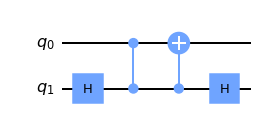

In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def controlled_sf(circuit, f, n):
    """ 
    Apply controlled-Sf operation
    :param circuit: Quantum circuit
    :param f: Function to be applied
    :param n: Number of qubits in the first register
    """
    # For demonstration purposes, we apply a Z gate for each bit in f's output that's 1
    # This assumes f returns a single bit (0 or 1) for simplicity
    if f(1) == 1:
        circuit.cz(0, 1)

def uf(circuit, f, n):
    """ 
    Transform controlled-Sf to Uf
    :param circuit: Quantum circuit
    :param f: Function to be applied
    :param n: Number of qubits in the first register
    """
    # Hadamard on second qubit
    circuit.h(1)
    
    # Apply controlled-Sf
    controlled_sf(circuit, f, n)
    
    # CNOT with second qubit as control and first as target
    circuit.cx(1, 0)
    
    # Hadamard on second qubit again
    circuit.h(1)


# Define the function f
def f(x):
    # Example function: returns x (Identity function for demonstration)
    return x

# Number of qubits in first register
n = 1

# Create a quantum circuit with 2 qubits (for simplicity, assuming a 1-qubit function)
circuit = QuantumCircuit(2)

# Prepare the initial state here if needed, for now assuming |0, 0>

# Transform controlled-Sf to Uf
uf(circuit, f, n)

# Draw the circuit
circuit.draw('mpl')


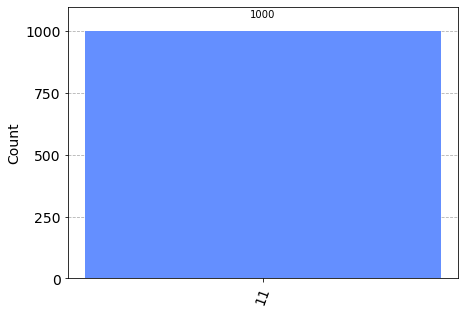

In [17]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def grover_oracle(n=2):
    """ Oracle for marking the |00⟩ state """
    qc = QuantumCircuit(n)
    qc.cz(0, 1)  # This will flip the sign of the state |00⟩
    return qc

def grover_diffusion(n=2):
    """ Grover diffusion operator for n=2 qubits """
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    qc.h(1)
    qc.cx(0, 1)
    qc.h(1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

# Create Grover circuit
n = 2
grover_circuit = QuantumCircuit(n, n)

# Initialize state to |s⟩
grover_circuit.h(range(n))

# Apply Grover iteration
grover_circuit = grover_circuit.compose(grover_oracle(n))
grover_circuit = grover_circuit.compose(grover_diffusion(n))

# Measurement
grover_circuit.measure(range(n), range(n))

# Simulate and plot results
backend = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)


In [22]:
import numpy as np

# Define constants
omega = np.exp(2j * np.pi / 10)
tau = (1 + np.sqrt(5)) / 2

# Define matrices
M1 = np.array([[omega**-4, 0], [0, omega**3]])
M1_inv = np.linalg.inv(M1)

base_M2 = np.array([[1/np.sqrt(tau), 1/np.sqrt(tau)], [1/np.sqrt(tau), -1/np.sqrt(tau)]])
M2 = base_M2 @ M1 @ np.linalg.inv(base_M2)
M2_inv = np.linalg.inv(M2)

gates = [M1, M1_inv, M2, M2_inv]

# Generate all possible sequences of gates of length <= 8
from itertools import product

def matrix_sequence_product(sequence):
    result = np.identity(2)
    for gate in sequence:
        result = result @ gates[gate]
    return result

# Define goal matrix form
goal_matrix = np.array([[0, 1], [1, 0]])

# Find sequences that get close to the goal matrix
best_distance = float("inf")
best_sequences = []

for length in range(1, 9):
    for sequence in product(range(4), repeat=length):
        resulting_matrix = matrix_sequence_product(sequence)
        
        # Measure distance to goal matrix by off-diagonal elements
        distance = np.abs(resulting_matrix[0, 0]) + np.abs(resulting_matrix[1, 1])
        if distance < best_distance:
            best_distance = distance
            best_sequences = [sequence]
        elif distance == best_distance:
            best_sequences.append(sequence)

# Print the best sequences
for seq in best_sequences:
    print(seq)


(0, 2, 3, 2, 2, 2, 2, 2)


In [1]:
import qiskit
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector

# Initialize a quantum circuit
qc = QuantumCircuit(1)

# H gate
qc.h(0)
state_h = Aer.get_backend('statevector_simulator').run(transpile(qc, Aer.get_backend('statevector_simulator'))).result().get_statevector()
plot_h = plot_bloch_multivector(state_h, title="H Gate")

# S gate
qc.s(0)
state_s = Aer.get_backend('statevector_simulator').run(transpile(qc, Aer.get_backend('statevector_simulator'))).result().get_statevector()
plot_s = plot_bloch_multivector(state_s, title="S Gate")

# T gate
qc.t(0)
state_t = Aer.get_backend('statevector_simulator').run(transpile(qc, Aer.get_backend('statevector_simulator'))).result().get_statevector()
plot_t = plot_bloch_multivector(state_t, title="T Gate")

# Display the plots
plot_h.show()
plot_s.show()
plot_t.show()



/var/folders/my/3k6ljkkn2fxf0bmxsr7jkrf00000gp/T/ipykernel_45789/3829929883.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_h.show()
/var/folders/my/3k6ljkkn2fxf0bmxsr7jkrf00000gp/T/ipykernel_45789/3829929883.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_s.show()
/var/folders/my/3k6ljkkn2fxf0bmxsr7jkrf00000gp/T/ipykernel_45789/3829929883.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_t.show()


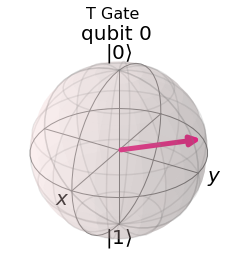

In [2]:
import qiskit
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_bloch_multivector

# Initialize a quantum circuit
qc = QuantumCircuit(1)

# H gate
qc.h(0)
state_h = Aer.get_backend('statevector_simulator').run(transpile(qc, Aer.get_backend('statevector_simulator'))).result().get_statevector()
plot_h = plot_bloch_multivector(state_h, title="H Gate")
plot_h  # Display the plot for H gate

# S gate
qc.s(0)
state_s = Aer.get_backend('statevector_simulator').run(transpile(qc, Aer.get_backend('statevector_simulator'))).result().get_statevector()
plot_s = plot_bloch_multivector(state_s, title="S Gate")
plot_s  # Display the plot for S gate

# T gate
qc.t(0)
state_t = Aer.get_backend('statevector_simulator').run(transpile(qc, Aer.get_backend('statevector_simulator'))).result().get_statevector()
plot_t = plot_bloch_multivector(state_t, title="T Gate")
plot_t  # Display the plot for T gate


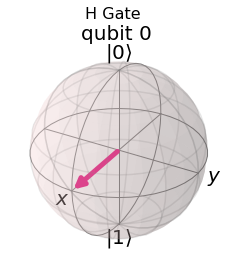

In [3]:
plot_h

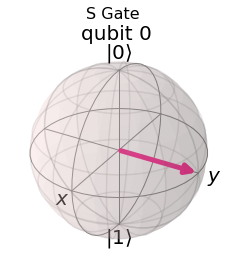

In [4]:
plot_s 

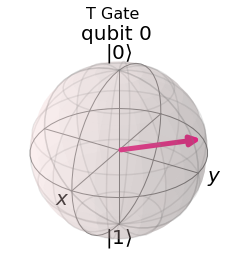

In [5]:
plot_t